In [1]:
# import headers
import numpy as np
import pandas as pd

In [20]:
# read in the dataset

url = 'https://raw.githubusercontent.com/scuacmw/Intro-to-Machine-Learning-Spring-2023/main/iris.csv'
dataset = pd.read_csv(url)
dataset.shape
dataset.head(5)

#dataset.groupby('species').size()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
# Split the dataset into X (features) and y (target)
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = dataset[feature_columns].values
y = dataset['species'].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


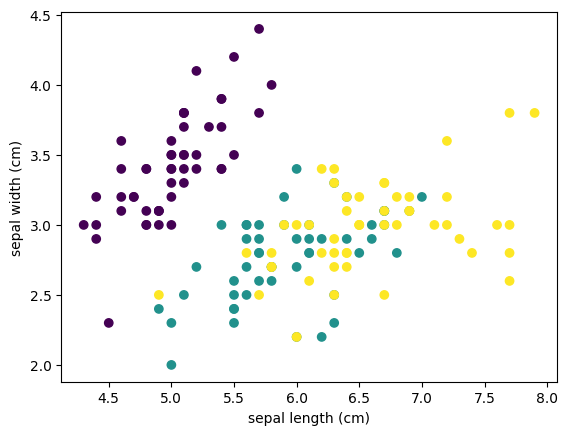

In [27]:
import matplotlib.pyplot as plt

# Create a scatter plot of the first two features
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()